In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
training=pd.read_csv(r"/kaggle/input/playground-series-s4e3/train.csv")

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [4]:
target_variable=training[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]
target_variable.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [5]:
### target variables fault records
print(target_variable[target_variable['Pastry']==1]['Pastry'].value_counts())
print(target_variable[target_variable['Z_Scratch']==1]['Z_Scratch'].value_counts())
print(target_variable[target_variable['K_Scatch']==1]['K_Scatch'].value_counts())
print(target_variable[target_variable['Stains']==1]['Stains'].value_counts())
print(target_variable[target_variable['Dirtiness']==1]['Dirtiness'].value_counts())
print(target_variable[target_variable['Bumps']==1]['Bumps'].value_counts())
print(target_variable[target_variable['Other_Faults']==1]['Other_Faults'].value_counts())

Pastry
1    1466
Name: count, dtype: int64
Z_Scratch
1    1150
Name: count, dtype: int64
K_Scatch
1    3432
Name: count, dtype: int64
Stains
1    568
Name: count, dtype: int64
Dirtiness
1    485
Name: count, dtype: int64
Bumps
1    4763
Name: count, dtype: int64
Other_Faults
1    6558
Name: count, dtype: int64


### finding 1 : Two types of steel is there A300,A400

In [6]:
### in A300 steel following is the bifurcation of the faults 
pd.pivot_table(training,values=['TypeOfSteel_A300'], index=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'],aggfunc='sum')

TypeOfSteel_A300
Pastry Z_Scratch K_Scatch Stains Dirtiness Bumps Other_Faults                  
0      0         0        0      0         0     0                          291
                                                 1                         2930
                                           1     0                         2919
                                 1         0     0                           77
                          1      0         0     0                           34
                 1        0      0         0     0                           28
                                                 1                            0
                                           1     0                            0
       1         0        0      0         0     0                          888
1      0         0        0      0         0     0                          572
                 1        0      0         0     0                            0

In [7]:
### faults in A400 steel
pd.pivot_table(training,values=['TypeOfSteel_A400'], index=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'],aggfunc='sum')

TypeOfSteel_A400
Pastry Z_Scratch K_Scatch Stains Dirtiness Bumps Other_Faults                  
0      0         0        0      0         0     0                          527
                                                 1                         3608
                                           1     0                         1842
                                 1         0     0                          408
                          1      0         0     0                          533
                 1        0      0         0     0                         3369
                                                 1                           17
                                           1     0                            2
       1         0        0      0         0     0                          262
1      0         0        0      0         0     0                          892
                 1        0      0         0     0                            1

In [8]:
independent_var=training.iloc[:,:-7]
independent_var.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000


In [9]:
# [['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]
training[training['Pastry']==1][['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum']].describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum
count,1466.000000,1466.000000,1.466000e+03,1.466000e+03
mean,930.532742,943.111869,1.747004e+06,1.739134e+06
std,540.095119,539.709417,1.878314e+06,1.872446e+06
min,0.000000,4.000000,7.003000e+03,7.020000e+03
25%,556.250000,570.250000,5.187472e+05,5.107810e+05
50%,1050.500000,1063.000000,1.225386e+06,1.219222e+06
75%,1330.750000,1340.000000,2.277931e+06,2.277688e+06
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07


In [10]:
training[training['Z_Scratch']==1][['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum']]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum
40,525,585,75115,75122
48,1065,1084,1593115,1593120
69,21,39,294032,294036
76,118,134,810184,810291
83,119,127,1072387,1072413
...,...,...,...,...
19156,134,156,1208774,1208843
19157,8,18,157035,157044
19174,18,28,66522,66578
19180,0,13,4048592,4048602


In [11]:
from sklearn.model_selection import train_test_split
training_new=training[['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas']]
test_new=training[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]
x_train, x_test, y_train, y_test=train_test_split(training_new,test_new,test_size=0.2,random_state=10)

In [12]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
x_train_fit=scl.fit_transform(x_train)
x_test_fit=scl.transform(x_test)

In [13]:
from xgboost import XGBClassifier
model_init=XGBClassifier()

In [14]:
model_init.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
from sklearn.metrics import roc_auc_score
y_pred_train=model_init.predict(x_train)

In [16]:
y_pred_test=model_init.predict(x_test)

In [17]:
roc_auc_score(y_test,y_pred_test,multi_class='ovr')

0.6884289927353222

In [18]:
# !pip install shap
import shap
explainer = shap.Explainer(model_init)

In [19]:
shap_values = explainer.shap_values(x_test_fit)

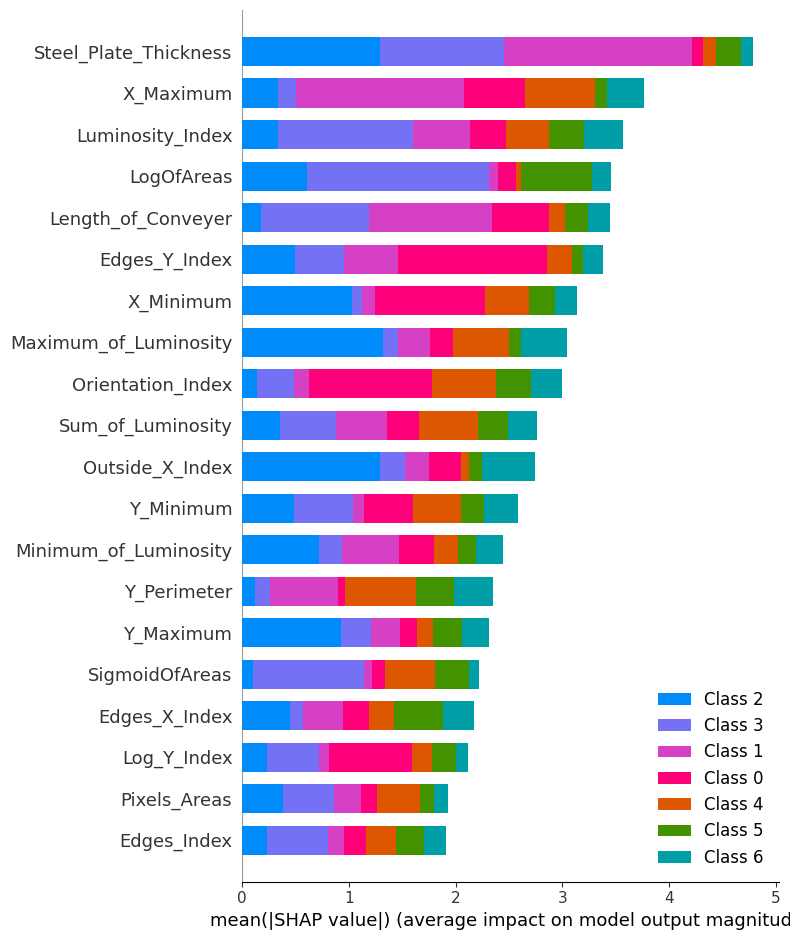

In [20]:
shap.summary_plot(shap_values, x_test, plot_type="bar") 

In [21]:
model_init.predict_proba(x_test)

array([[2.7898864e-03, 1.3437925e-04, 7.1144804e-02, ..., 9.5578283e-03,
        1.9770589e-02, 2.2967057e-01],
       [4.1837909e-04, 3.5132326e-03, 1.2124025e-01, ..., 5.2481866e-04,
        5.0634213e-02, 4.7697803e-01],
       [1.2259711e-02, 5.1092397e-04, 5.6515378e-06, ..., 3.4331784e-04,
        7.3728937e-01, 2.9011938e-01],
       ...,
       [2.0623019e-01, 3.3482062e-05, 2.0789696e-04, ..., 2.5781633e-03,
        4.0504992e-02, 4.7768766e-01],
       [4.3244129e-03, 1.0557807e-05, 2.9739303e-06, ..., 4.8450695e-04,
        7.3992538e-01, 1.7223507e-01],
       [6.4428568e-05, 4.4608736e-05, 9.9613637e-01, ..., 3.3770830e-05,
        1.3614768e-04, 7.0736498e-02]], dtype=float32)

In [22]:
features_to_look_into=['Steel_Plate_Thickness','X_Minimum','Sum_of_Luminosity','Minimum_of_Luminosity','Y_Minimum','Orientation_Index','Edges_Y_Index','Maximum_of_Luminosity','Edges_X_Index','Luminosity_Index','Empty_Index','X_Perimeter','Log_Y_Index','Length_of_Conveyer','Square_Index','SigmoidOfAreas','Y_Maximum','Outside_X_Index','LogOfAreas']

In [23]:
training[['Steel_Plate_Thickness','X_Minimum','Sum_of_Luminosity','Minimum_of_Luminosity','Y_Minimum','Orientation_Index','Edges_Y_Index','Maximum_of_Luminosity','Empty_Index','Edges_X_Index','Luminosity_Index','Empty_Index','X_Perimeter','Log_Y_Index','Length_of_Conveyer','Square_Index','SigmoidOfAreas','Y_Maximum','Outside_X_Index','LogOfAreas','Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']].corr()

,Steel_Plate_Thickness,X_Minimum,Sum_of_Luminosity,Minimum_of_Luminosity,Y_Minimum,Orientation_Index,Edges_Y_Index,Maximum_of_Luminosity,Empty_Index,Edges_X_Index,Luminosity_Index,Empty_Index,X_Perimeter,Log_Y_Index,Length_of_Conveyer,Square_Index,SigmoidOfAreas,Y_Maximum,Outside_X_Index,LogOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
Steel_Plate_Thickness,1.000000,0.188764,-0.215082,0.133881,-0.054389,0.240923,0.255632,-0.113917,-0.061710,-0.036774,-0.102066,-0.061710,-0.225757,-0.094453,0.243282,-0.048431,-0.125354,-0.058683,-0.270063,-0.202286,0.080037,-0.010609,-0.303104,-0.079751,0.011784,0.008460,0.202910
X_Minimum,0.188764,1.000000,-0.430073,0.337748,0.016071,0.276871,0.460421,-0.132955,-0.175624,0.112746,-0.068844,-0.175624,-0.451961,-0.375324,0.308740,0.045635,-0.376973,0.014247,-0.522112,-0.505024,0.119306,-0.107581,-0.510597,0.046159,0.044439,0.205123,0.169608
Sum_of_Luminosity,-0.215082,-0.430073,1.000000,-0.580857,-0.008189,-0.234625,-0.608297,0.128569,0.271448,-0.315125,-0.013845,0.271448,0.802072,0.615651,-0.194282,0.031948,0.520282,-0.007809,0.703912,0.726483,-0.093160,-0.059598,0.640597,-0.074245,-0.046712,-0.207316,-0.184651
Minimum_of_Luminosity,0.133881,0.337748,-0.580857,1.000000,-0.017321,0.179385,0.467841,0.397265,-0.096133,0.234592,0.619174,-0.096133,-0.603891,-0.585194,0.018612,0.062940,-0.504692,-0.018739,-0.638549,-0.691406,-0.004622,0.061146,-0.586957,0.166976,0.077386,0.134339,0.208857
Y_Minimum,-0.054389,0.016071,-0.008189,-0.017321,1.000000,-0.044202,-0.002647,-0.029160,-0.033792,0.052710,-0.023000,-0.033792,-0.012712,-0.023702,0.016586,0.033952,-0.031511,0.969552,0.019685,-0.001754,-0.015512,-0.012143,0.010612,-0.039151,-0.005449,0.056442,-0.019227
Orientation_Index,0.240923,0.276871,-0.234625,0.179385,-0.044202,1.000000,0.607271,-0.113531,-0.179199,-0.412696,-0.104336,-0.179199,-0.234969,0.144861,0.180770,-0.209706,-0.089470,-0.042490,-0.467688,-0.214866,0.261302,0.069028,-0.414475,-0.119092,0.146887,0.034166,0.104130
Edges_Y_Index,0.255632,0.460421,-0.608297,0.467841,-0.002647,0.607271,1.000000,-0.153276,-0.465523,0.136147,-0.053778,-0.465523,-0.664781,-0.464314,0.296749,0.083152,-0.594737,-0.001382,-0.760021,-0.713607,0.201774,0.049456,-0.678464,0.088256,0.083560,0.206651,0.150978
Maximum_of_Luminosity,-0.113917,-0.132955,0.128569,0.397265,-0.029160,-0.113531,-0.153276,1.000000,0.108878,-0.014785,0.853856,0.108878,0.158036,0.004650,-0.181411,0.061480,0.018501,-0.028312,0.074610,0.033191,-0.086090,-0.076961,0.121755,0.115789,0.020471,-0.069808,-0.008368
Empty_Index,-0.061710,-0.175624,0.271448,-0.096133,-0.033792,-0.179199,-0.465523,0.108878,1.000000,-0.323494,0.085117,1.000000,0.322417,0.360459,-0.252708,-0.125258,0.480116,-0.032824,0.293223,0.379479,-0.133623,0.085455,0.204526,-0.065599,-0.011674,-0.133638,0.005157
Edges_X_Index,-0.036774,0.112746,-0.315125,0.234592,0.052710,-0.412696,0.136147,-0.014785,-0.323494,1.000000,0.072659,-0.323494,-0.378672,-0.651384,0.110726,0.299610,-0.538678,0.051546,-0.156802,-0.462665,-0.101720,-0.052205,-0.156152,0.214387,-0.103736,0.160995,0.021238


In [127]:
## mean luminosity=maxmin/2
# column_list_to_take_for=['Steel_Plate_Thickness','Length_of_Conveyer','X_Minimum','Y_Minimum','Sum_of_Luminosity','Mean_luminosity','Orientation_Index','Edges_Y_Index','Edges_X_Index','Empty_Index','X_Perimeter','LogOfAreas']

In [111]:
# training['Mean_luminosity']=(training['Maximum_of_Luminosity']+training['Minimum_of_Luminosity'])/2

In [24]:
training_final=training[features_to_look_into]
test_new=training[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [25]:
x_train, x_test, y_train, y_test=train_test_split(training_final,test_new,test_size=0.2,random_state=10)

In [26]:
# from sklearn.preprocessing import StandardScaler
# scl=StandardScaler()
# x_train_fit=scl.fit_transform(x_train)
# x_test_fit=scl.transform(x_test)

In [28]:
model_init.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred_test=model_init.predict(x_test)

In [30]:
roc_auc_score(y_test,y_pred_test)

0.6915145643348255

In [31]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-5, 1e2),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-5, 1e2),
        "lambda": trial.suggest_loguniform("lambda", 1e-5, 1e2),
        "alpha": trial.suggest_loguniform("alpha", 1e-5, 1e2),
        "random_state": 10,
        "tree_method": "gpu_hist" if "gpu" in trial.system_attrs else "auto",
        "eval_metric": "mlogloss"
    }
    model = XGBClassifier(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = roc_auc_score(y_test, y_pred,multi_class='ovr')
    return accuracy

In [32]:
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-03-09 12:34:23,406] A new study created in memory with name: no-name-3b2e564c-33f8-4e97-8c3e-8b75f0e39165
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

In [33]:
test_mera=pd.read_csv(r"/kaggle/input/playground-series-s4e3/test.csv").drop('id',axis=1)

In [34]:
test_mera.columns.to_list()

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [35]:
best_params_mera=study.best_params

In [49]:
model_mera=XGBClassifier(**best_params_mera)


In [50]:
def auc_score(estimator,x,y):
    y_prob=estimator.predict_proba(x)
    return roc_auc_score(y,y_prob,multi_class="ovr")

In [51]:
from sklearn.model_selection import cross_val_score
mean_score=cross_val_score(model_mera,x_train,y_train,scoring=auc_score,cv=5)
print(f"AUC score {mean_score.mean()}")

AUC score 0.8789144889816564


In [52]:
test_mera_new=test_mera[features_to_look_into]


In [55]:
model_mera.fit(x_train,y_train)
y_pred_mere=model_mera.predict_proba(test_mera_new)

In [56]:
submission=pd.read_csv("/kaggle/input/playground-series-s4e3/sample_submission.csv")

In [58]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
12809,32028,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12810,32029,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12811,32030,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12812,32031,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [59]:
submission[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=y_pred_mere
submission.to_csv("submission.csv",index=False)

<Axes: >

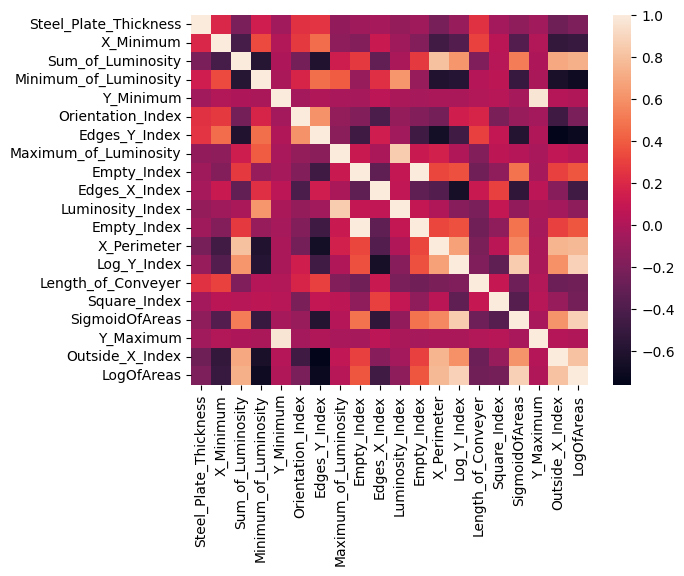

In [78]:
sns.heatmap(training[['Steel_Plate_Thickness','X_Minimum','Sum_of_Luminosity','Minimum_of_Luminosity','Y_Minimum','Orientation_Index','Edges_Y_Index','Maximum_of_Luminosity','Empty_Index','Edges_X_Index','Luminosity_Index','Empty_Index','X_Perimeter','Log_Y_Index','Length_of_Conveyer','Square_Index','SigmoidOfAreas','Y_Maximum','Outside_X_Index','LogOfAreas']].corr())aa

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Steel_Plate_Thickness', ylabel='Count'>

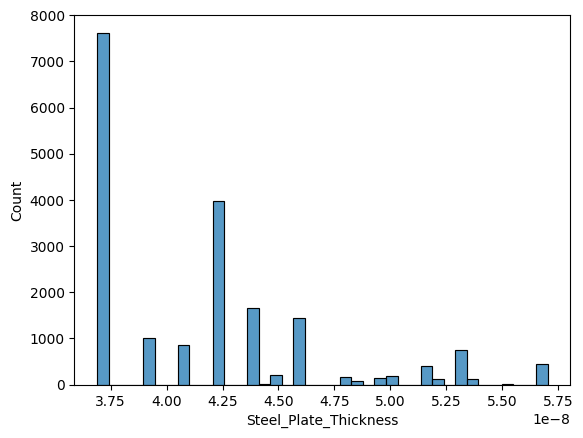

In [22]:
training.columns.to_list()

['id',
 'X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [12]:
sns.histplot(independent_var[''])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  